# AI512: Introduction to Machine Learning
## University of Southern Denmark - IMADA
### Fall 2024 - Melih Kandemir

---
# Exercise 03
---

- Expectation and Variance Proofs
- Random Variables
- Shrinkage of Estimation Error
- Covariance Matrix

### Expectation and Variance Proofs

Prove the following equalities:

1. $E[aX + bY] = aE[X] + bE[Y]$ for independent random variables $X$ and $Y$ where $a$ and $b$ are constants.
2. $Var[X] = E[X^2] - E[X]^2$
3. $Var[mX] = m^2Var[X]$  where $m$ is a constant.
4. $Var[mX + n] = m^2Var[X]$ where $m$ and $n$ are constants.
5. $Var[\sum_{i=1}^n X_i] = \sum_{i=1}^n Var[X_i]$ for independent and identically distributed (i.i.d.) random variables $X_i$.

1. $  $

### Random Variables

Consider the experiment of rolling two fair dice. Answer the following questions:

1. What is the inducing probability distribution for the random variable $X$ that shows the sum of the outcomes?
2. What is the probability of the following event? $P(X \geq 5 \text{ and } X \text{ is even})$? Are these two events independent and why?
3. What is the expected value of $X$ and the variance of $X$?

### Shrinkage of Estimation Error

We have normal distributions $\mathcal{N}(0, 1), \mathcal{N}(0, 4), \mathcal{N}(1, 1), \text{ and } \mathcal{N}(1, 4)$. 

For each distribution do the following:
1. Using different sample sizes $n \in \{10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000\}$, draw 
    $n$ samples from the distribution and compute the sample mean $\hat{\mu}$ and the sample variance $\hat{\sigma}^2$
2. Compute the estimation error $\mid\hat{\mu} - \mu\mid$ for each sample size $n$.
3. Plot the estimation error as a function of $n$.
4. Plot the true mean and the sample mean as a function of $n$.
5. Plot the true variance and the sample variance as a function of $n$.
6. Interpret the results. What happens as $n$ increases?

Hints: 
1. Use the `numpy` library to draw samples from the normal distribution.
2. Use the `matplotlib` library to plot the results.
    - Use log scale on x


### Covariance Matrix

In this exercise, we will investigate the effect of covariance on the shape of multivariate Gaussian distributions. We will use 0 mean distributions $\mu = [0, 0]$. 
1. Plot the contour of the following covariance matrices:
    - Spherical Covariance Matrices:
        - $\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
        - $\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$
    - Diagonal Covariance Matrices:
        - $\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$
        - $\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$
    - Full Covariance Matrices:
        - $\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$
        - $\Sigma = \begin{bmatrix} 1 & -0.5 \\ -0.5 & 1 \end{bmatrix}$
        - $\Sigma = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 1 \end{bmatrix}$
        - $\Sigma = \begin{bmatrix} 1 & -0.9 \\ -0.9 & 1 \end{bmatrix}$
2. What is the effect of covariance on the shape of the distribution?

Hints:
1. You can use the code from the lecture notes.

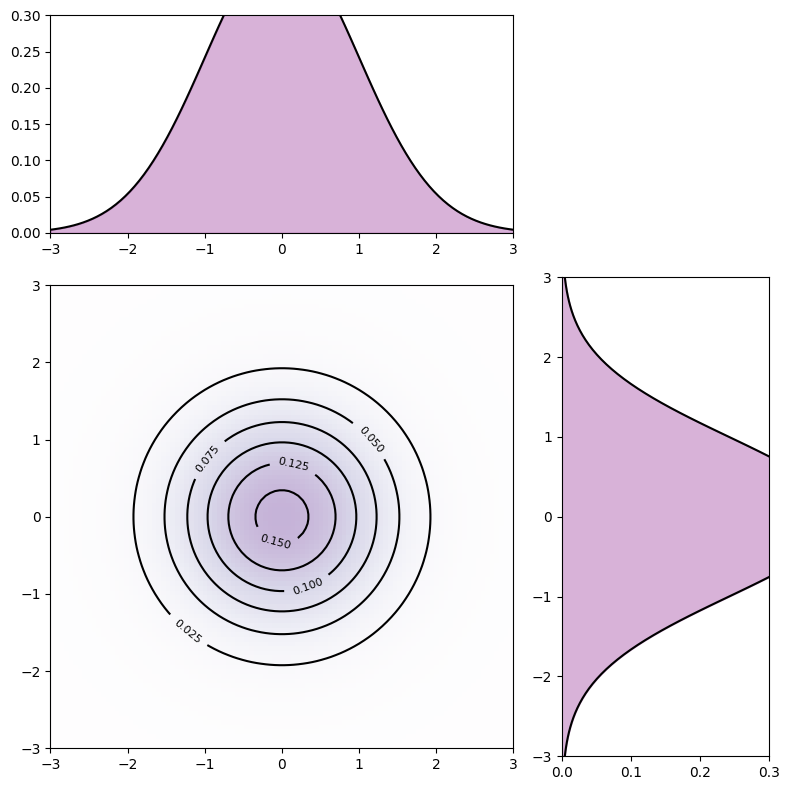

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, 0], [0, 1]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

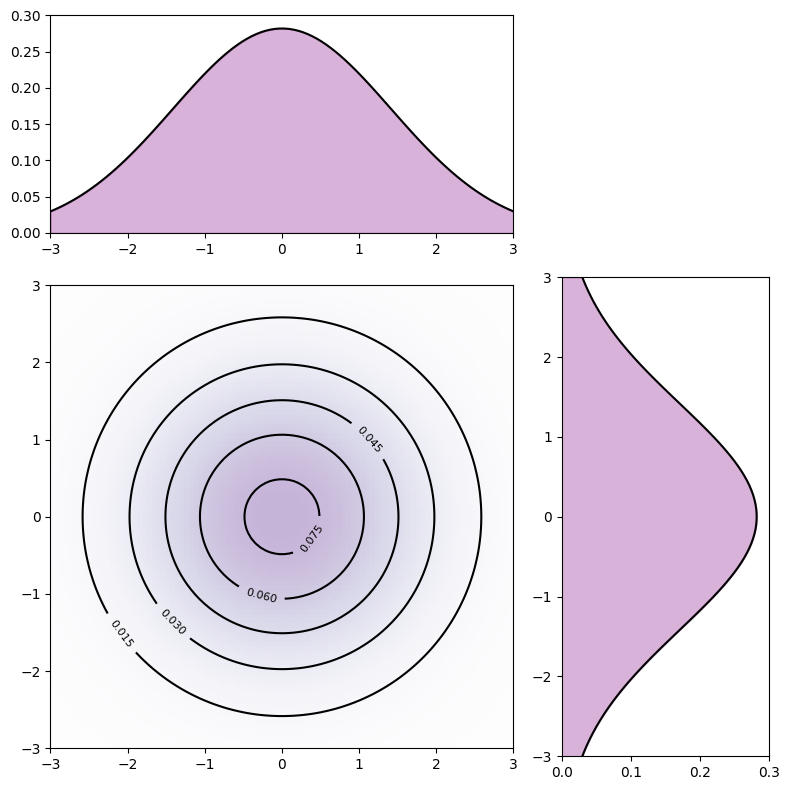

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[2, 0], [0, 2]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

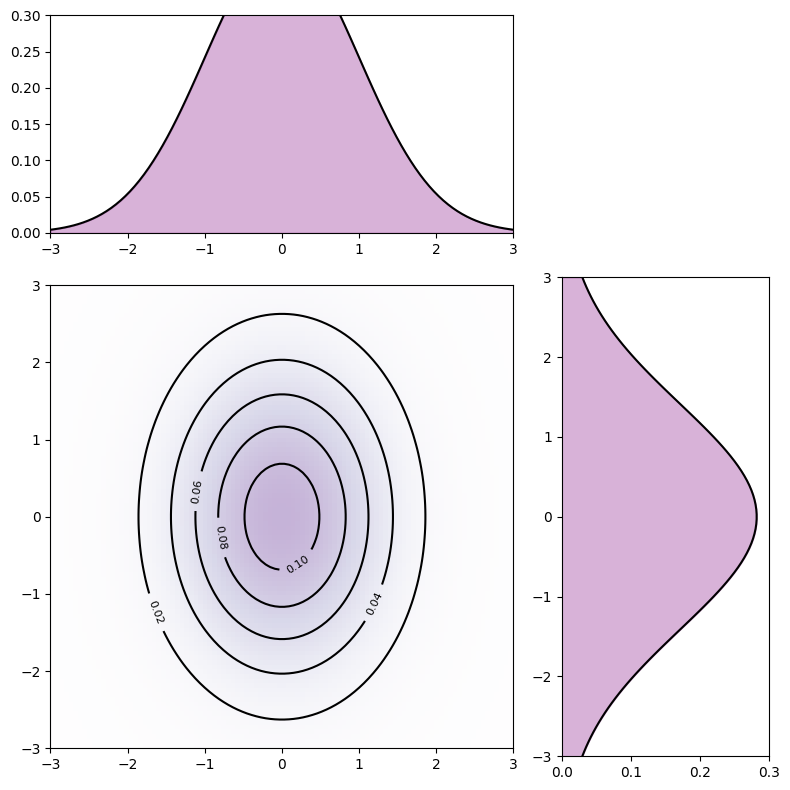

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, 0], [0, 2]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

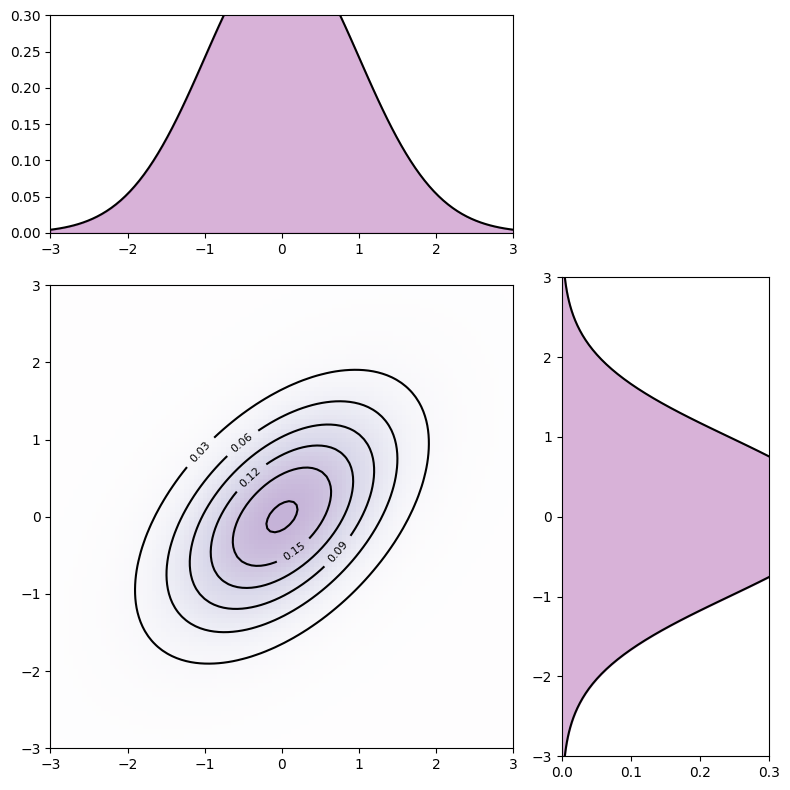

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

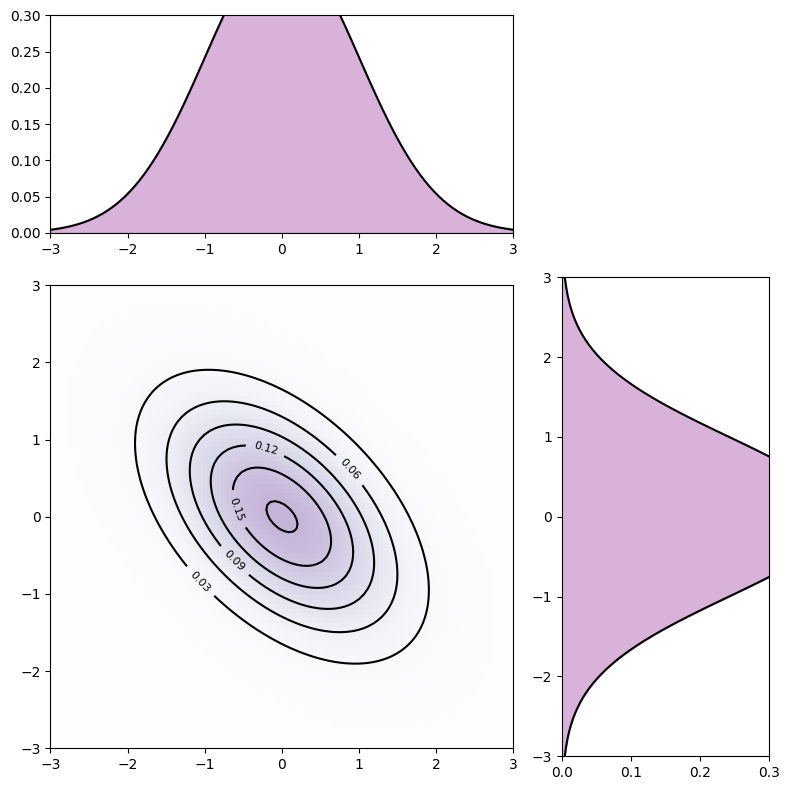

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, -0.5], [-0.5, 1]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

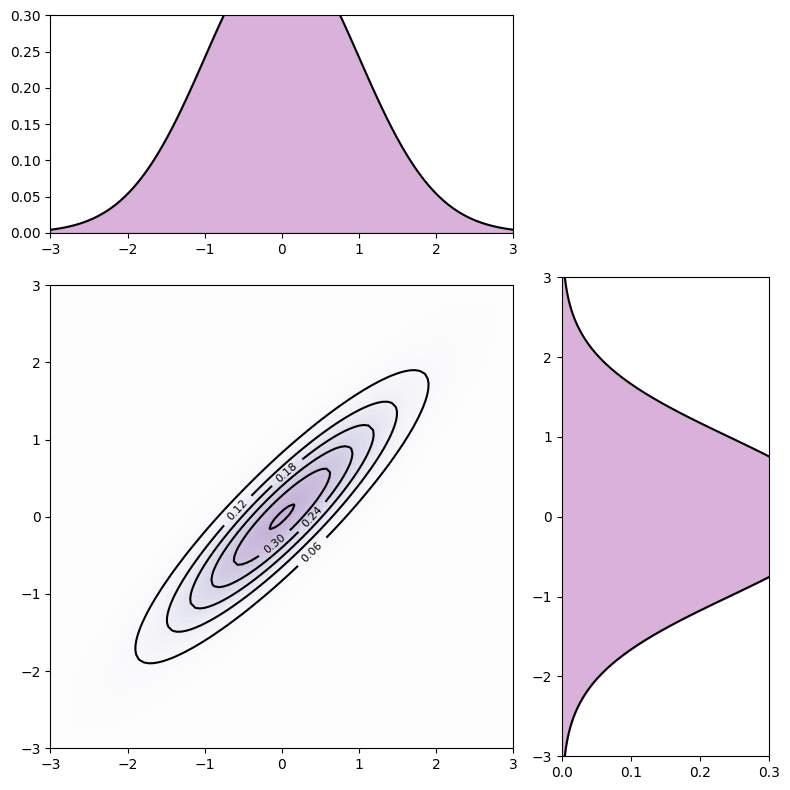

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, 0.9], [0.9, 1]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()

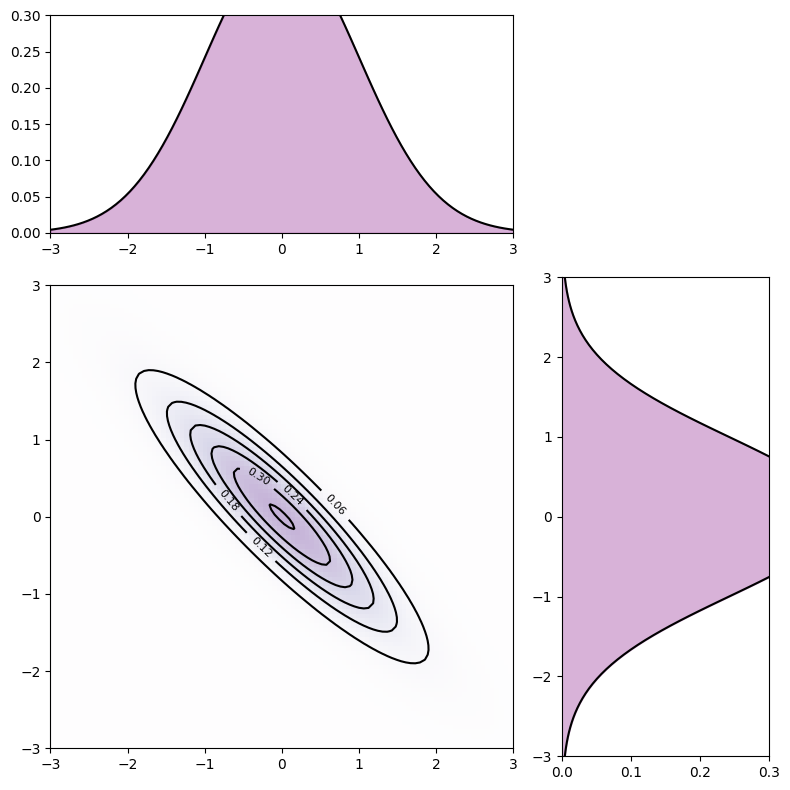

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 0], [0, 1]]
mean = np.array([0, 0])
cov_matrix = np.array([[1, -0.9], [-0.9, 1]])

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
xx, yy = np.meshgrid(xs, ys)

# Compute the density of the multivariate Gaussian at each point on the grid
pos = np.dstack((xx, yy))
norm2d_densities = multivariate_normal(mean, cov_matrix).pdf(pos)

# Compute the marginal density of the Gaussian for each variable
marginal_x_vals = norm(loc=mean[0], scale=np.sqrt(cov_matrix[0, 0])).pdf(xs)
marginal_y_vals = norm(loc=mean[1], scale=np.sqrt(cov_matrix[1, 1])).pdf(ys)

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
plt.tight_layout()
plt.show()